The goal of our analysis is to determine a few indicators of heavy traffic on I-94. 

These indicators can be weather type, time of the day, time of the week, etc. 

For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import numpy as np

In [144]:
data_directory = 'C:/Personal Projects/Dataquest/Python Project/Finding Heavy Traffic Indicators on I-94/'

In [145]:
df = pd.read_csv(data_directory+'Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [146]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [147]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [149]:
print('Total rows of the data is: ', df.shape[0])
print('\n')
print('Total cols of the data is: ', df.shape[1])
print('\n')
print('Ther is no Null values in any columns except holiday column. But it is expected to have Null values in that column.')
print('\n')
print('5 numeric columns and 4 text columns')

Total rows of the data is:  48204


Total cols of the data is:  9


Ther is no Null values in any columns except holiday column. But it is expected to have Null values in that column.


5 numeric columns and 4 text columns


In [150]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


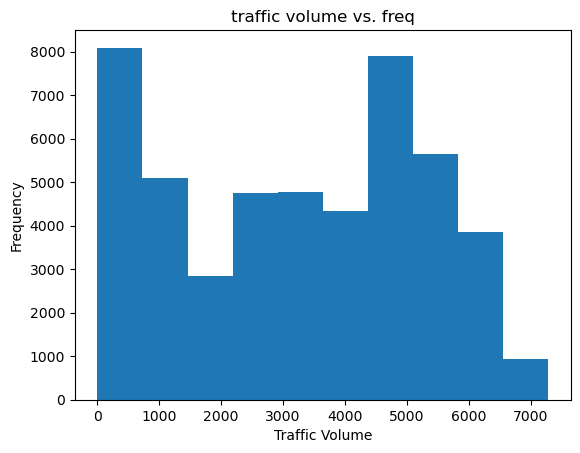

In [151]:
df.traffic_volume.plot.hist()
plt.title('traffic volume vs. freq')
plt.xlabel('Traffic Volume')
plt.show()

In [152]:
df.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

In [153]:
df.date_time = pd.to_datetime(df.date_time)

In [154]:
day = df.copy()[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
print(day.shape)

night = df.copy()[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


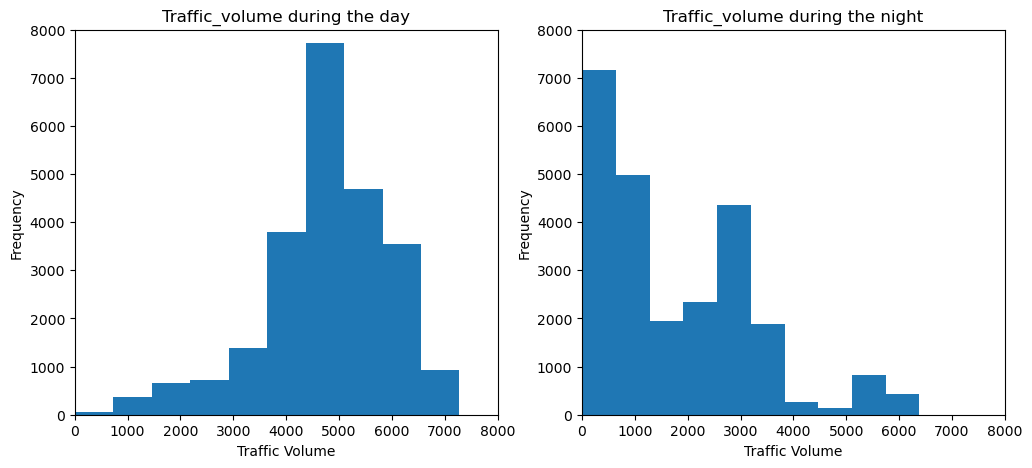

In [155]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.hist(day.traffic_volume)
plt.title('Traffic_volume during the day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.subplot(1,2,2)
plt.hist(night.traffic_volume)
plt.title('Traffic_volume during the night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.show()

In [157]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<Axes: xlabel='month'>

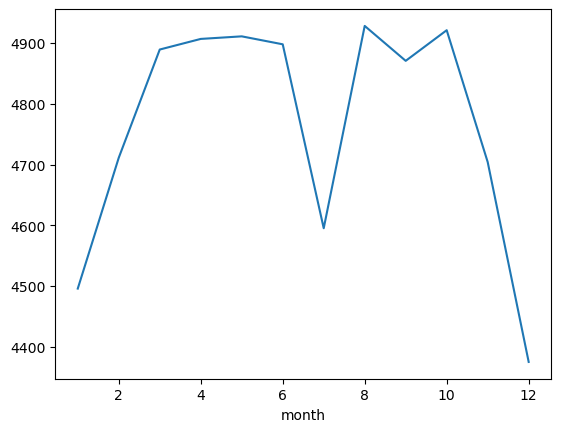

In [158]:
by_month['traffic_volume'].plot.line()

In [161]:
day['day'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('day').mean(numeric_only=True)
by_dayofweek['traffic_volume']

day
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<Axes: xlabel='day'>

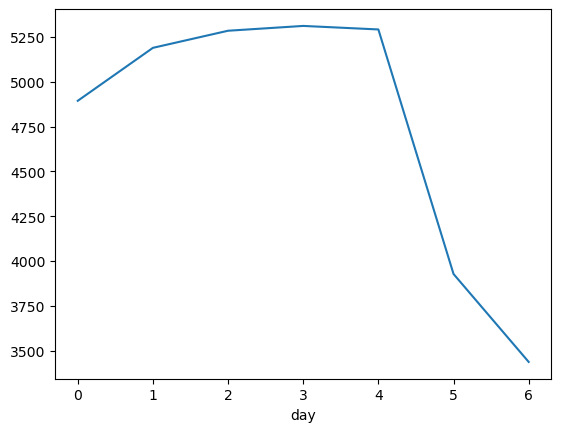

In [162]:
by_dayofweek['traffic_volume'].plot.line()

In [165]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['day'] <= 4] # 4 == Friday
weekend = day.copy()[day['day'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

In [168]:
by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [169]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

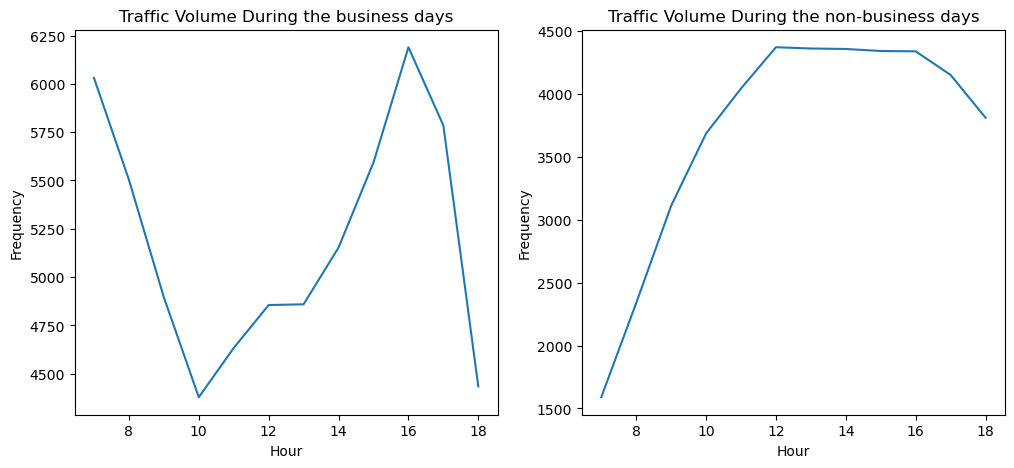

In [173]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume During the business days')
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume During the non-business days')
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.show()

In [175]:
day.corr(numeric_only=True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day              -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

(230.0, 350.0)

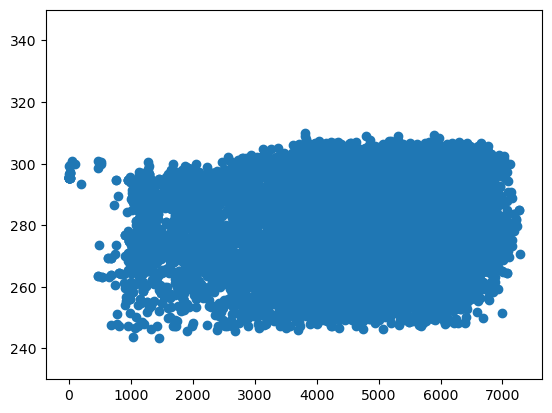

In [180]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(230,350)

In [189]:
weather_main = day.groupby('weather_main').mean(numeric_only=True)
weather_main['traffic_volume']

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

In [190]:
weather_description = day.groupby('weather_description').mean(numeric_only=True)
weather_description['traffic_volume']

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

<Axes: ylabel='weather_main'>

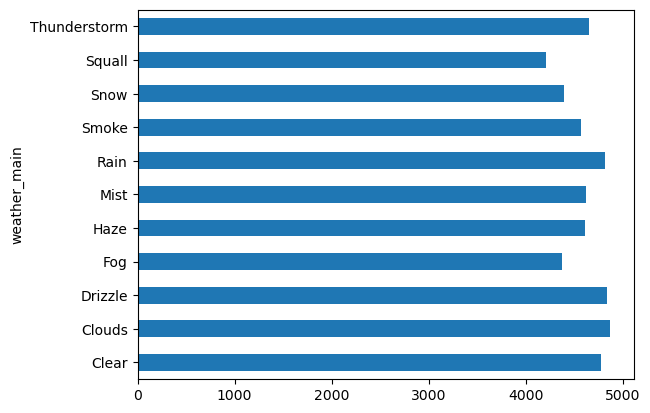

In [192]:
weather_main['traffic_volume'].plot(kind='barh')

<Axes: ylabel='weather_description'>

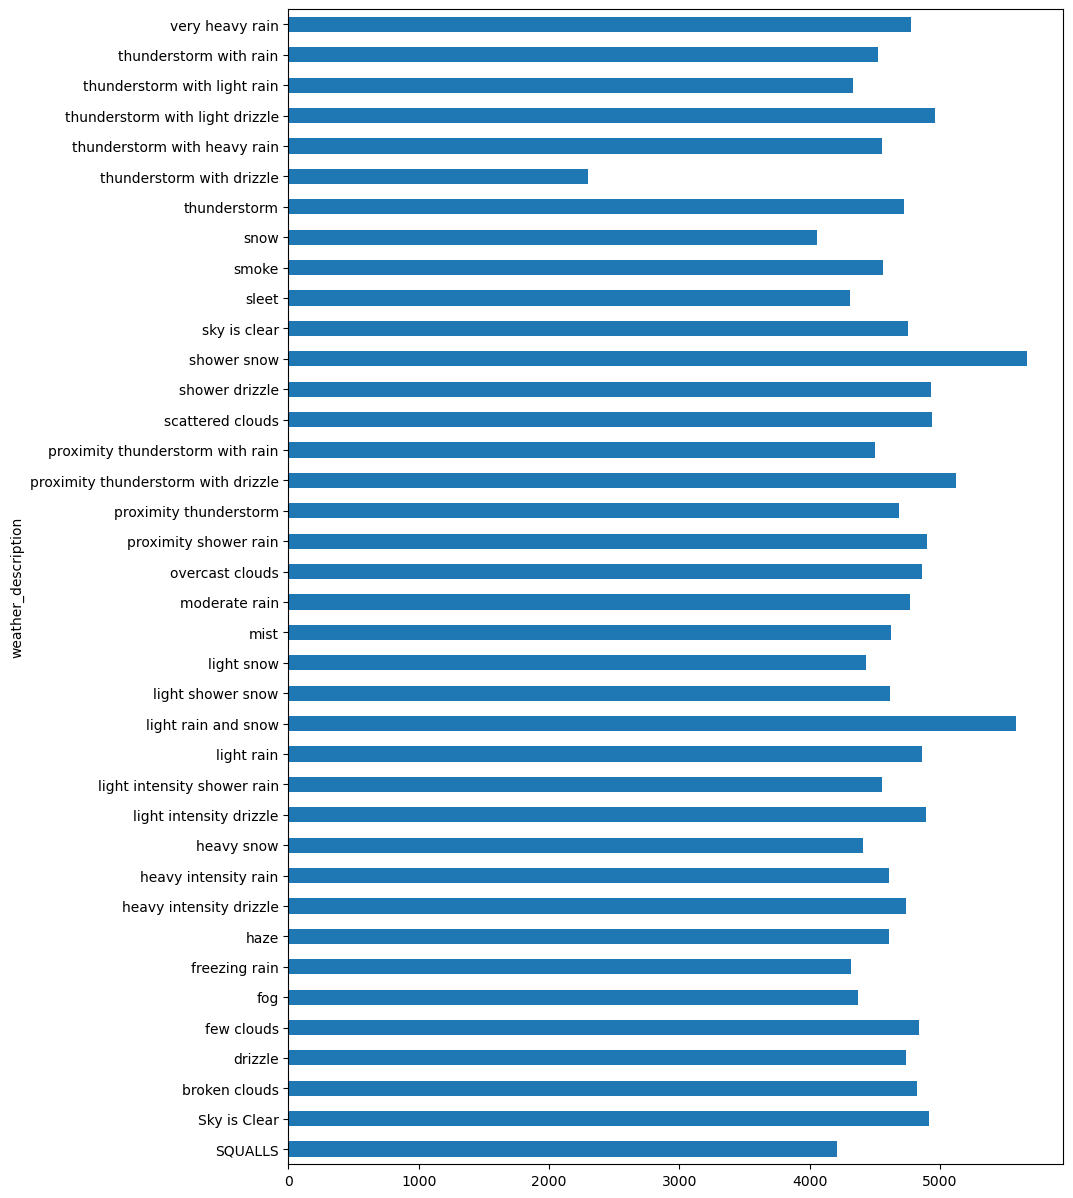

In [198]:
plt.figure(figsize=(10,15))
weather_description['traffic_volume'].plot(kind='barh')